In [9]:
FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR   = '../Data_Sets/p2/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
from IPython import display
from ClassPerceptron import Perceptron
from sklearn import preprocessing
import grafica as gr
from ClassNeuronaLineal import NeuronaLineal
from ClassNeuronaGral import *
from sklearn.preprocessing import MinMaxScaler

# Regresión Logística Múltiple (varias variables de entrada y salida sigmoide en (0,1) o (-1,1))

## Ejercicio 8

El archivo **semillas.csv** contiene información de granos que pertenecen a tres variedades diferentes de trigo. Entrene una neurona no lineal para determinar si una semilla es de **TIPO 2** o no. Divida el 60% de los ejemplos para entrenar y el 40% para realizar el testeo. Antes de entrenar, normalice todos los atributos numéricos aplicando media y desvío.

Realice los siguientes experimentos con el fin de analizar cómo distintos hiperparámetros afectan la convergencia y el desempeño del modelo:

### a) 

Lleve a cabo **20 experimentos**, utilizando la función **sigmoide**, variando la **tasa de aprendizaje** desde $\alpha = 0.04$, incrementando en pasos de **0.04** (es decir, $\alpha = 0.04, ~0.08, \dots, ~0.80$). En cada experimento, registre:
- Curva de **error** (error por iteración).  
- Curva de **accuracy** (precisión por iteración).  
- Cantidad total de iteraciones realizadas.  
- Iteración en la que se alcanzó el **100% de accuracy**.  



=== Experimento 1 | α = 0.04 ===


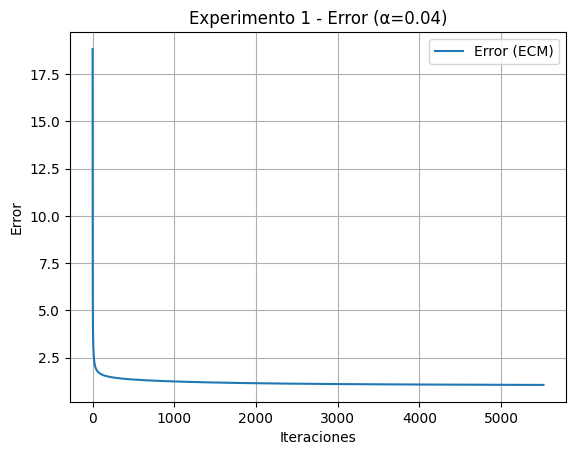

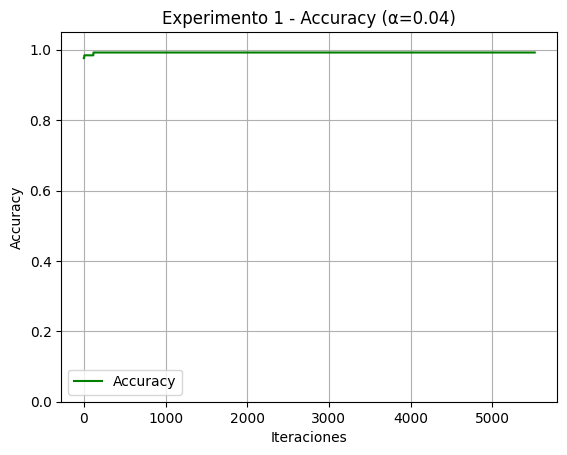

Cantidad total de iteraciones: 5520
Nunca se alcanzó el 100% de accuracy.

=== Experimento 2 | α = 0.08 ===


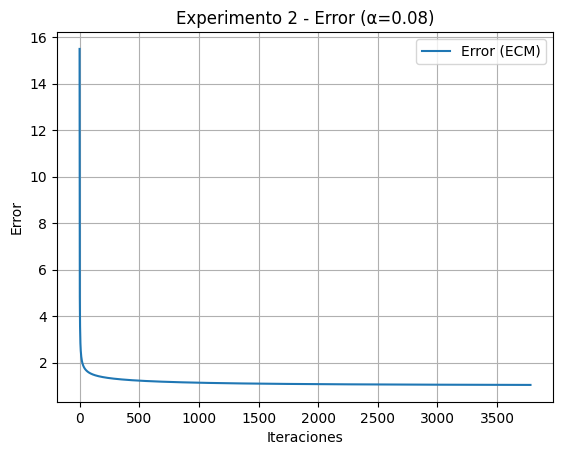

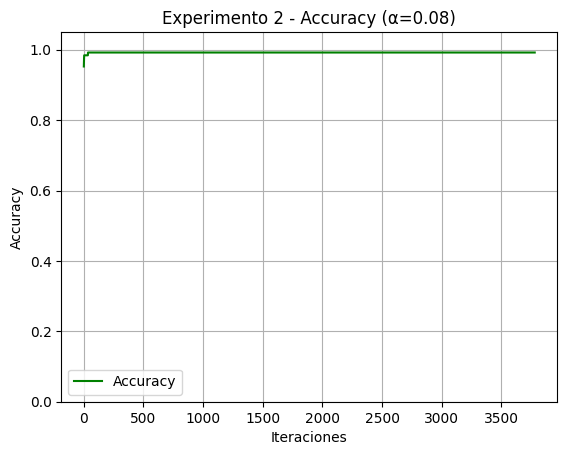

Cantidad total de iteraciones: 3781
Nunca se alcanzó el 100% de accuracy.

=== Experimento 3 | α = 0.12 ===


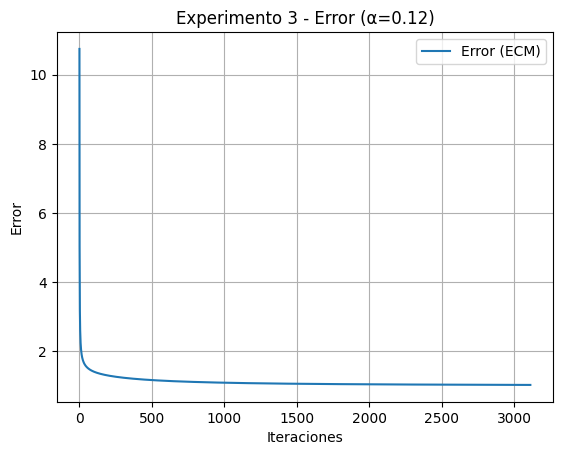

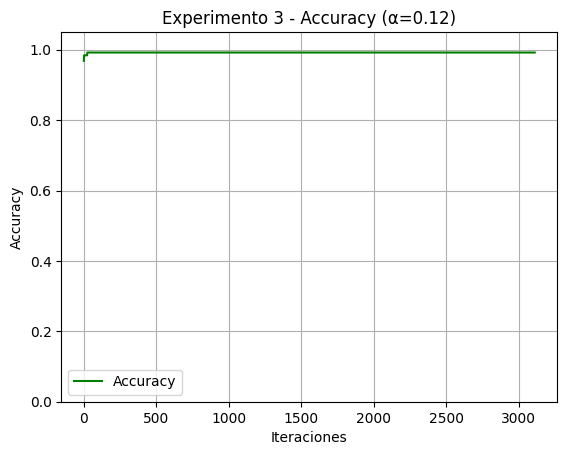

Cantidad total de iteraciones: 3111
Nunca se alcanzó el 100% de accuracy.

=== Experimento 4 | α = 0.16 ===


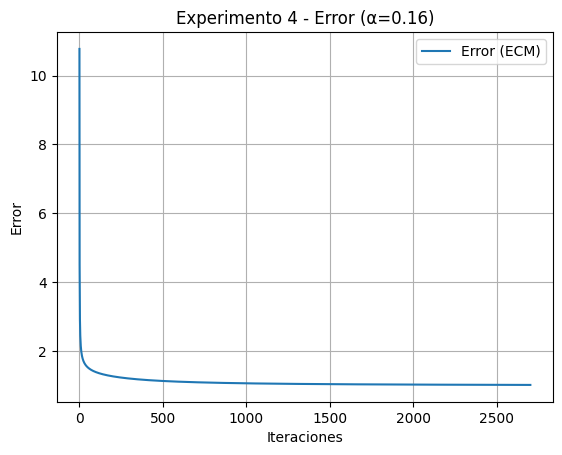

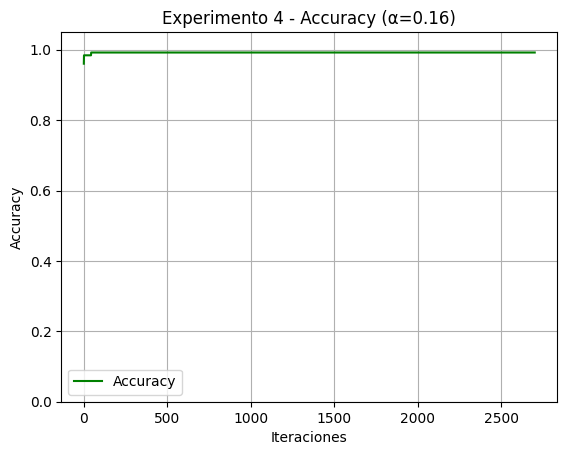

Cantidad total de iteraciones: 2701
Nunca se alcanzó el 100% de accuracy.

=== Experimento 5 | α = 0.20 ===


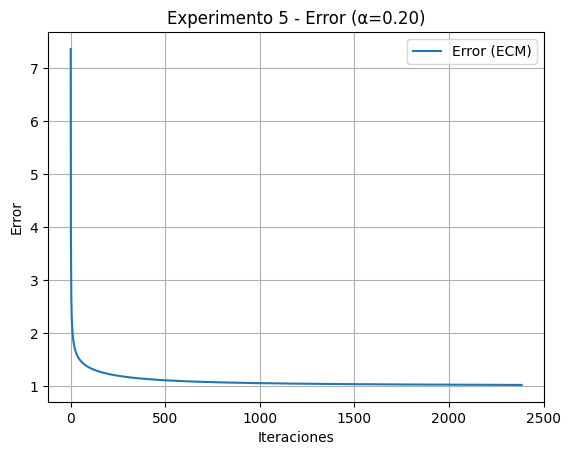

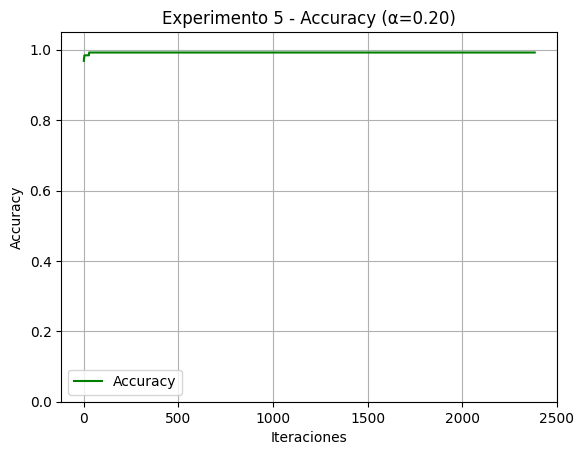

Cantidad total de iteraciones: 2385
Nunca se alcanzó el 100% de accuracy.

=== Experimento 6 | α = 0.24 ===


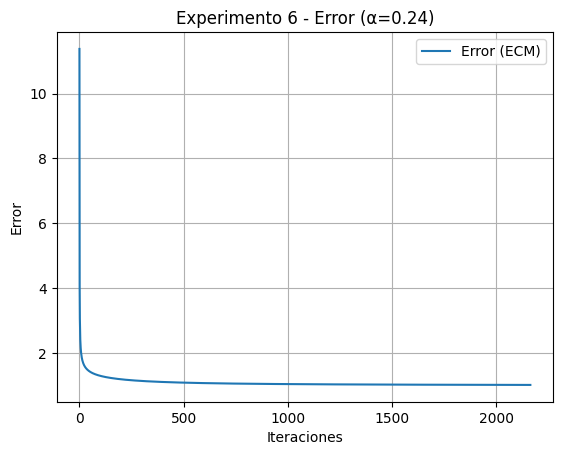

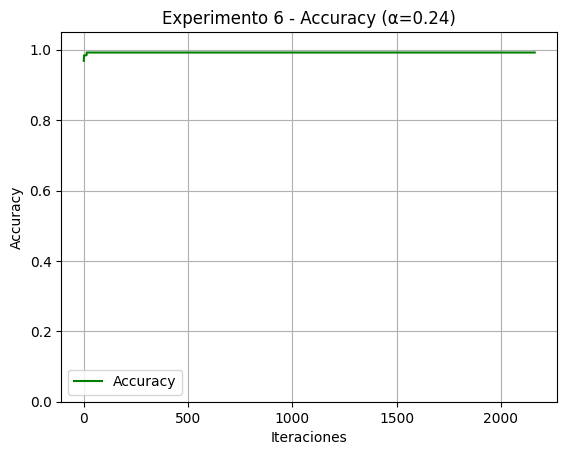

Cantidad total de iteraciones: 2164
Nunca se alcanzó el 100% de accuracy.

=== Experimento 7 | α = 0.28 ===


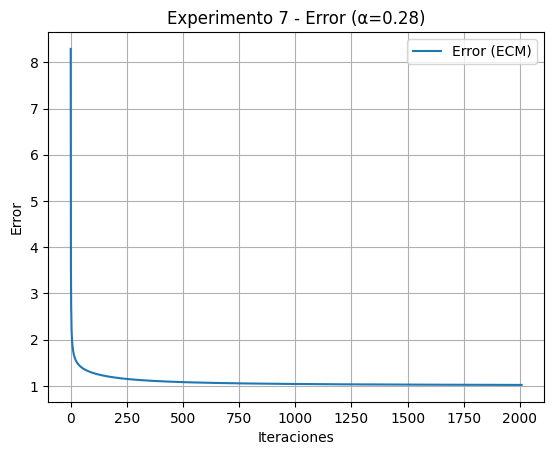

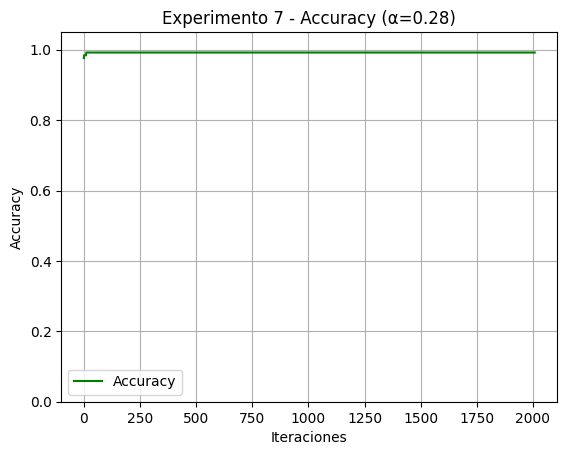

Cantidad total de iteraciones: 2009
Nunca se alcanzó el 100% de accuracy.

=== Experimento 8 | α = 0.32 ===


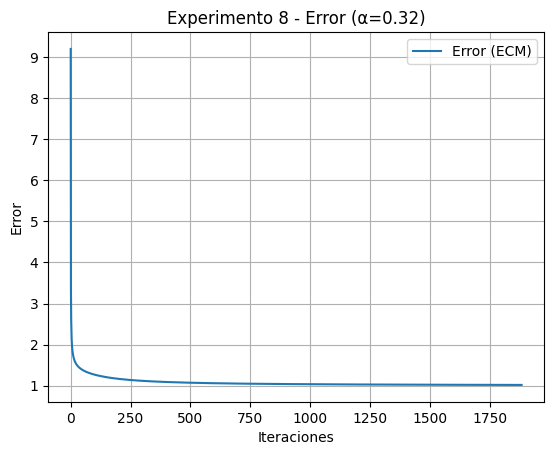

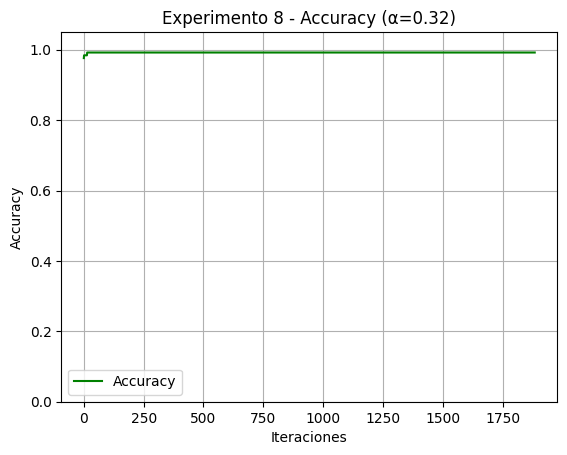

Cantidad total de iteraciones: 1885
Nunca se alcanzó el 100% de accuracy.

=== Experimento 9 | α = 0.36 ===


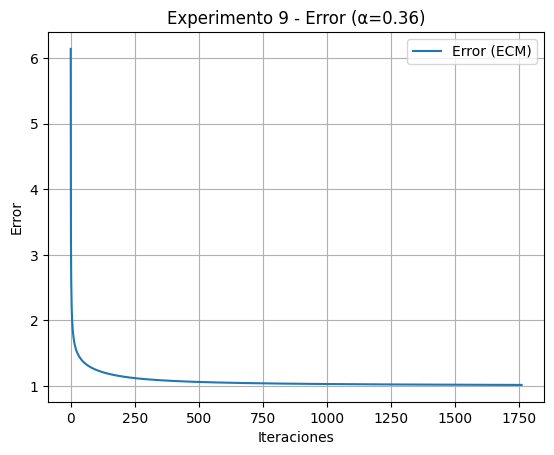

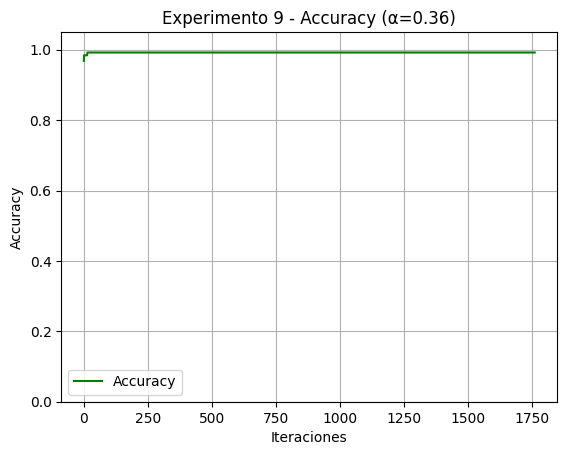

Cantidad total de iteraciones: 1763
Nunca se alcanzó el 100% de accuracy.

=== Experimento 10 | α = 0.40 ===


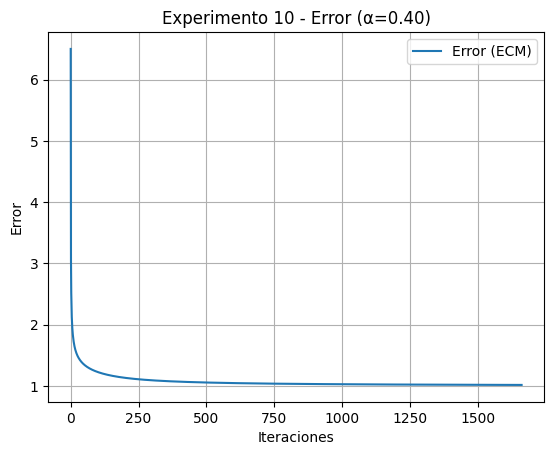

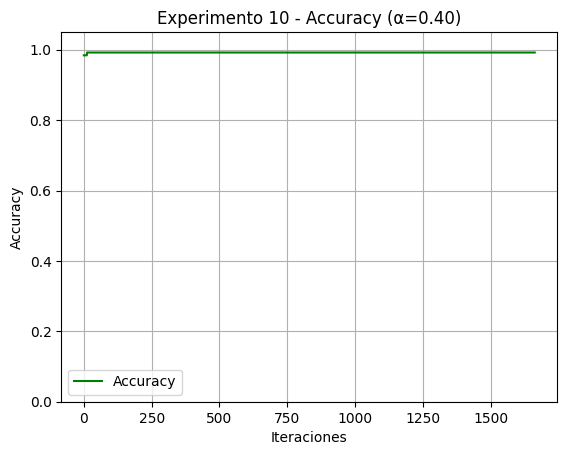

Cantidad total de iteraciones: 1663
Nunca se alcanzó el 100% de accuracy.

=== Experimento 11 | α = 0.44 ===


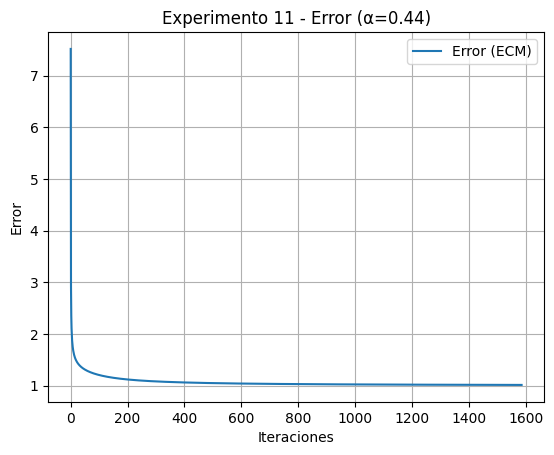

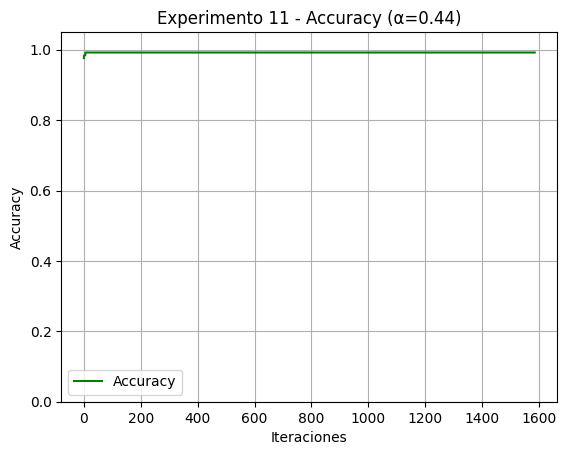

Cantidad total de iteraciones: 1586
Nunca se alcanzó el 100% de accuracy.

=== Experimento 12 | α = 0.48 ===


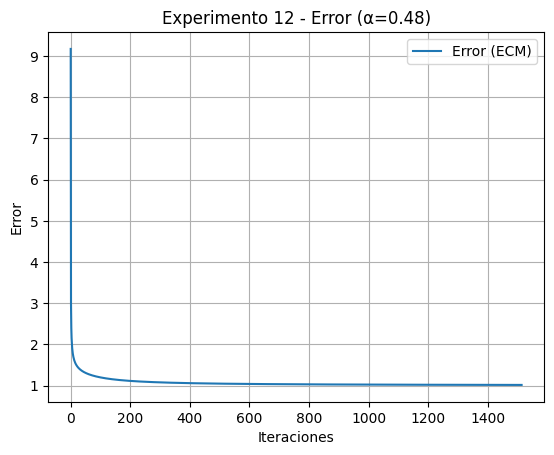

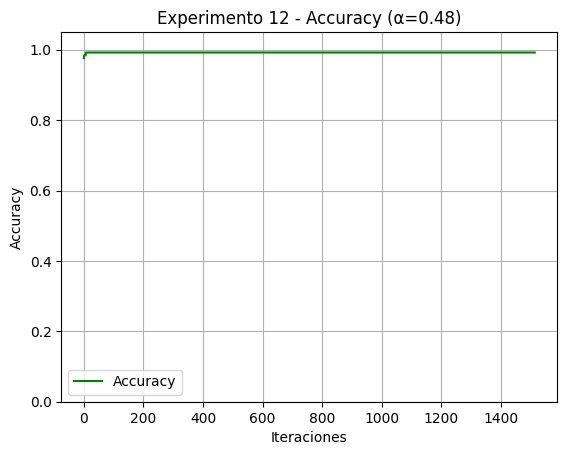

Cantidad total de iteraciones: 1515
Nunca se alcanzó el 100% de accuracy.

=== Experimento 13 | α = 0.52 ===


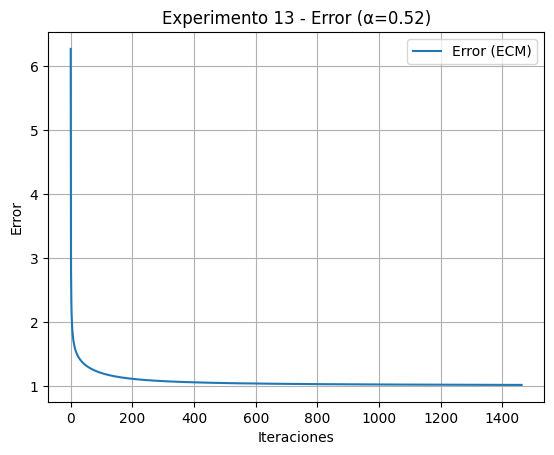

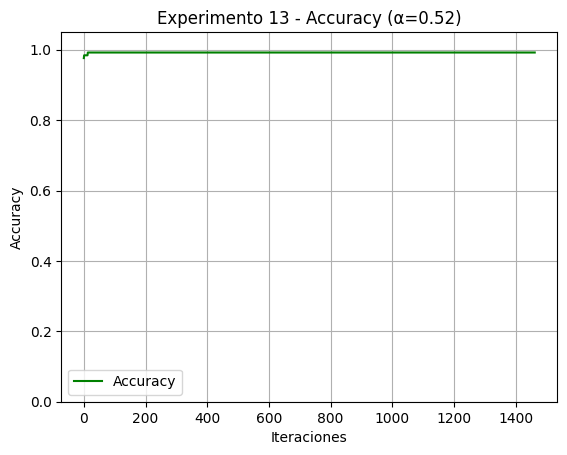

Cantidad total de iteraciones: 1463
Nunca se alcanzó el 100% de accuracy.

=== Experimento 14 | α = 0.56 ===


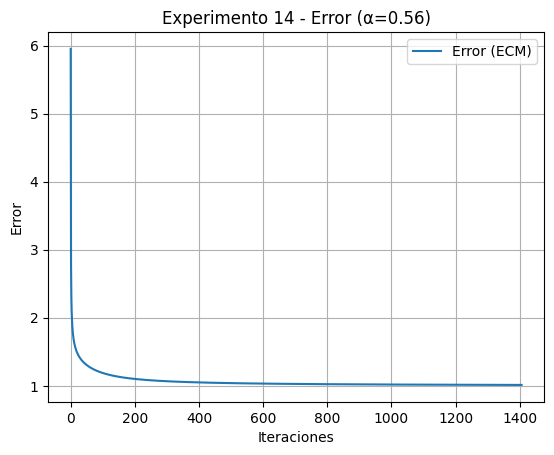

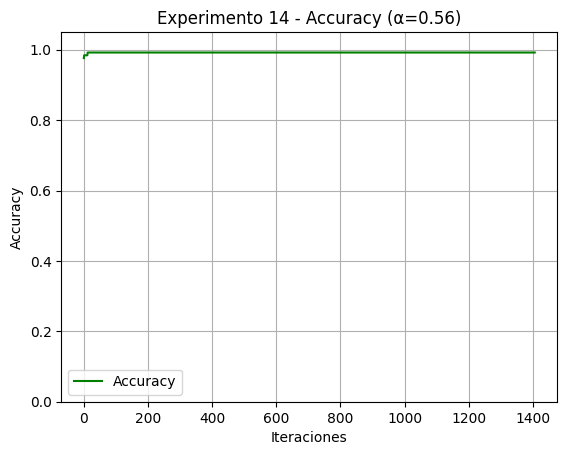

Cantidad total de iteraciones: 1407
Nunca se alcanzó el 100% de accuracy.

=== Experimento 15 | α = 0.60 ===


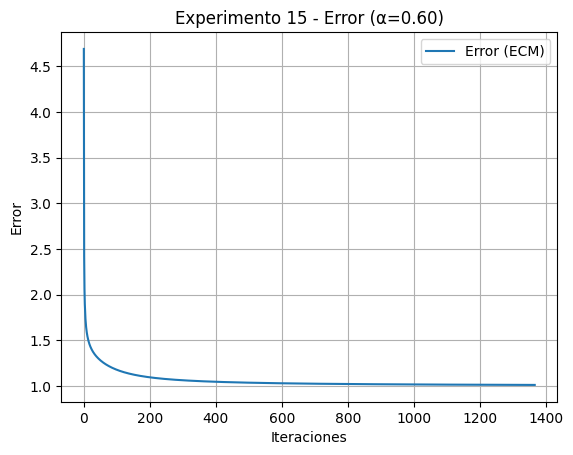

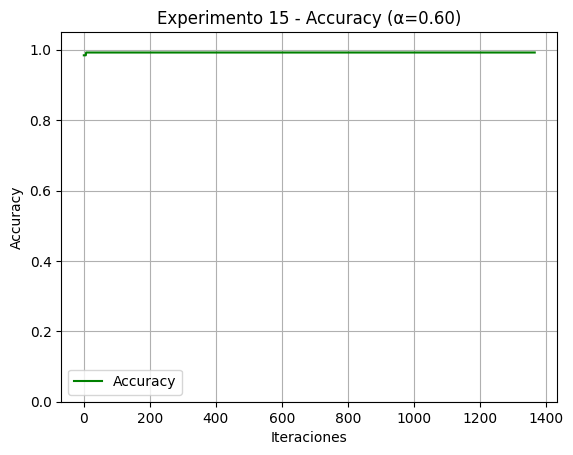

Cantidad total de iteraciones: 1367
Nunca se alcanzó el 100% de accuracy.

=== Experimento 16 | α = 0.64 ===


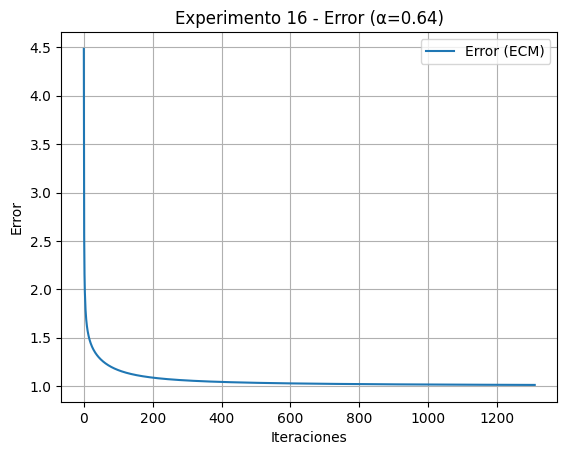

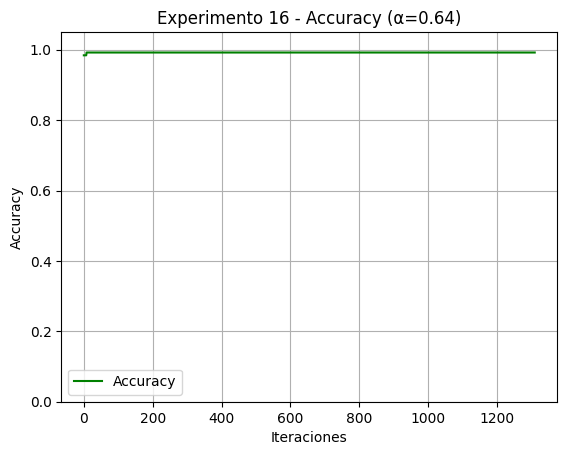

Cantidad total de iteraciones: 1311
Nunca se alcanzó el 100% de accuracy.

=== Experimento 17 | α = 0.68 ===


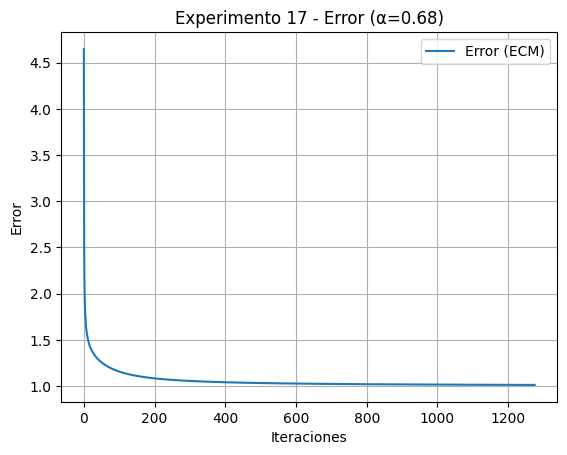

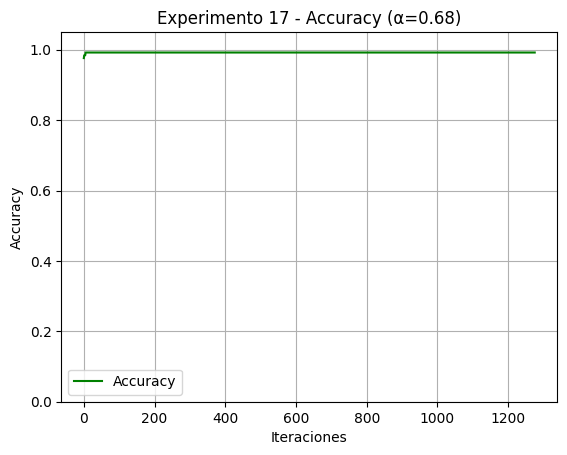

Cantidad total de iteraciones: 1276
Nunca se alcanzó el 100% de accuracy.

=== Experimento 18 | α = 0.72 ===


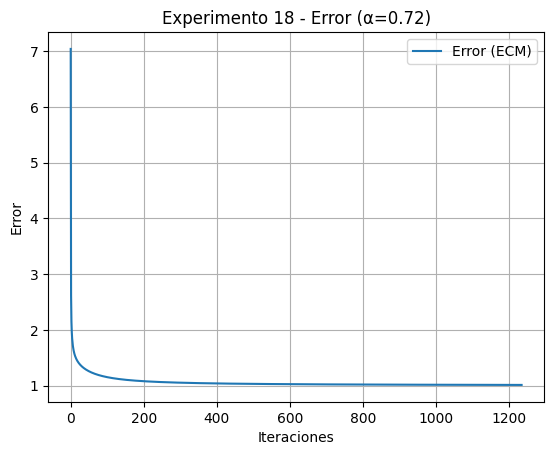

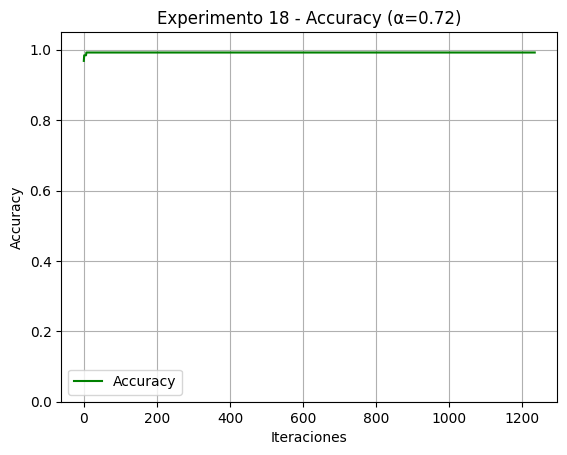

Cantidad total de iteraciones: 1235
Nunca se alcanzó el 100% de accuracy.

=== Experimento 19 | α = 0.76 ===


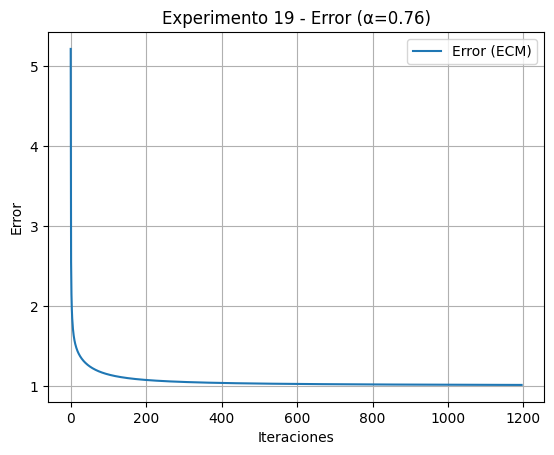

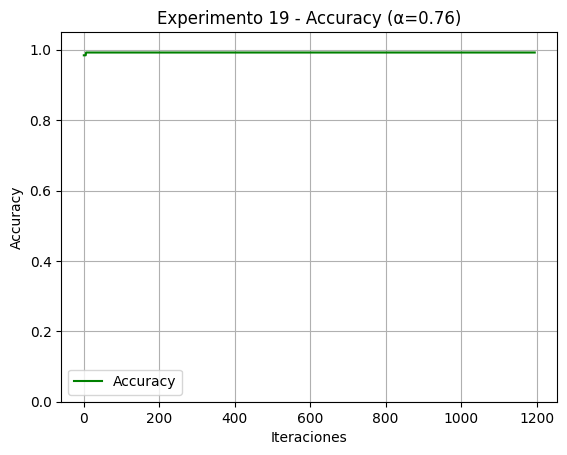

Cantidad total de iteraciones: 1196
Nunca se alcanzó el 100% de accuracy.

=== Experimento 20 | α = 0.80 ===


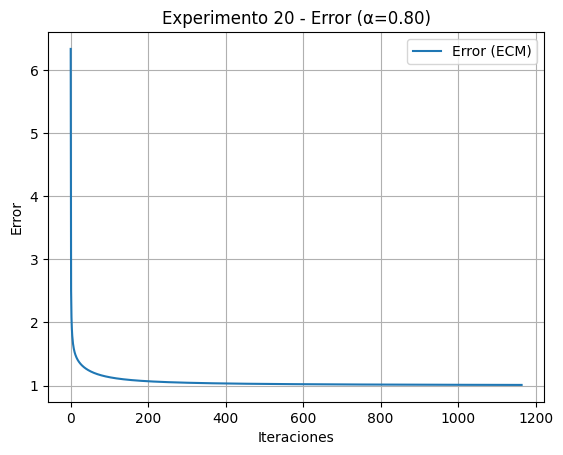

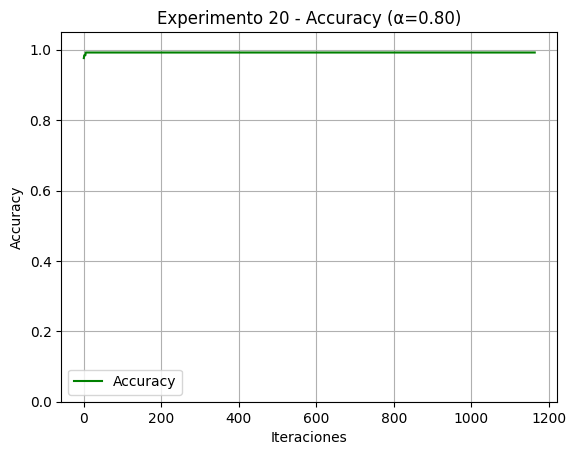

Cantidad total de iteraciones: 1165
Nunca se alcanzó el 100% de accuracy.

Resumen de experimentos:
 Experimento  Alpha  Iteraciones Iter_100%
           1   0.04         5520      None
           2   0.08         3781      None
           3   0.12         3111      None
           4   0.16         2701      None
           5   0.20         2385      None
           6   0.24         2164      None
           7   0.28         2009      None
           8   0.32         1885      None
           9   0.36         1763      None
          10   0.40         1663      None
          11   0.44         1586      None
          12   0.48         1515      None
          13   0.52         1463      None
          14   0.56         1407      None
          15   0.60         1367      None
          16   0.64         1311      None
          17   0.68         1276      None
          18   0.72         1235      None
          19   0.76         1196      None
          20   0.80         1165      No

In [17]:
# --- Datos ---
data = pd.read_csv(DATOS_DIR + 'semillas.csv', sep=',')

# Numerizamos la columna 'Clase'
mapeo = {'Tipo1': 1, 'Tipo2': 2, 'Tipo3': 3}
data['Clase'] = data['Clase'].map(mapeo)

# Dividimos en train y test
data_train = data.sample(frac=0.6, random_state=1)
data_test = data.drop(data_train.index)

# Normalizamos por z-score
scaler = preprocessing.StandardScaler().fit(data_train.drop('Clase', axis=1))
X = scaler.transform(data_train.drop('Clase', axis=1))
T = scaler.transform(data_test.drop('Clase', axis=1))

# Etiquetas (Tipo2 vs no-Tipo2)
y_train = (data_train['Clase'] == 2).astype(int).to_numpy()
y_test  = (data_test['Clase'] == 2).astype(int).to_numpy()

# --- Parámetros generales ---
MAX_ITE = 10000
COTA = 10e-6

# --- Experimentos ---
resultados = []

for idx, ALPHA in enumerate([0.04 * (i+1) for i in range(20)], start=1):
    print(f"\n=== Experimento {idx} | α = {ALPHA:.2f} ===")

    ng = NeuronaGradiente(
        alpha=ALPHA, n_iter=MAX_ITE, cotaE=COTA,
        FUN='sigmoid', title=['Semillas','Tipo2'], with_bias=True
    )
    ng.fit(X, y_train)

    # --- Gráfico Error ---
    plt.figure()
    plt.plot(ng.errors_, label="Error (ECM)")
    plt.xlabel("Iteraciones")
    plt.ylabel("Error")
    plt.title(f"Experimento {idx} - Error (α={ALPHA:.2f})")
    plt.legend()
    plt.grid(True)
    plt.show()

    # --- Gráfico Accuracy ---
    plt.figure()
    plt.plot(ng.accuracy_, label="Accuracy", color="green")
    plt.xlabel("Iteraciones")
    plt.ylabel("Accuracy")
    plt.title(f"Experimento {idx} - Accuracy (α={ALPHA:.2f})")
    plt.ylim(0, 1.05)
    plt.legend()
    plt.grid(True)
    plt.show()

    # --- Métricas ---
    total_iters = len(ng.errors_)
    iters_100 = next((i for i, acc in enumerate(ng.accuracy_, start=1) if acc == 1.0), None)

    print(f"Cantidad total de iteraciones: {total_iters}")
    if iters_100:
        print(f"Accuracy 100% alcanzada en la iteración: {iters_100}")
    else:
        print("Nunca se alcanzó el 100% de accuracy.")

    # Guardamos resultados en tabla
    resultados.append({
        "Experimento": idx,
        "Alpha": ALPHA,
        "Iteraciones": total_iters,
        "Iter_100%": iters_100
    })

# --- Tabla resumen ---
df_resultados = pd.DataFrame(resultados)
print("\nResumen de experimentos:")
print(df_resultados.to_string(index=False))

### b) 

Replique el punto a) utilizando **tangente hiperbólica**.  



=== Experimento 1 | α = 0.04 ===


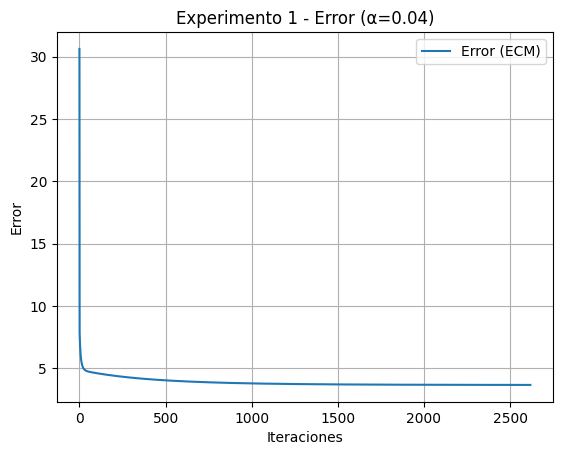

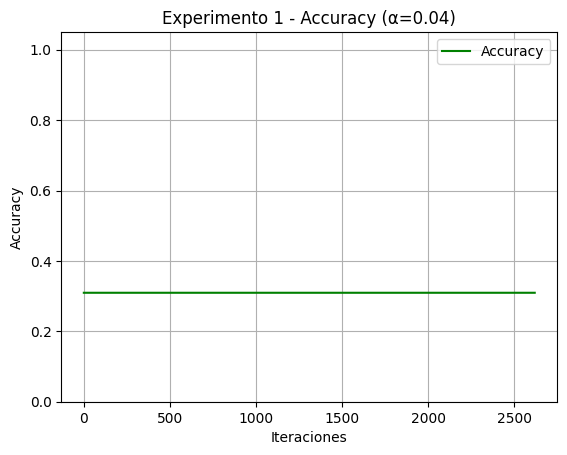

Cantidad total de iteraciones: 2619
Nunca se alcanzó el 100% de accuracy.

=== Experimento 2 | α = 0.08 ===


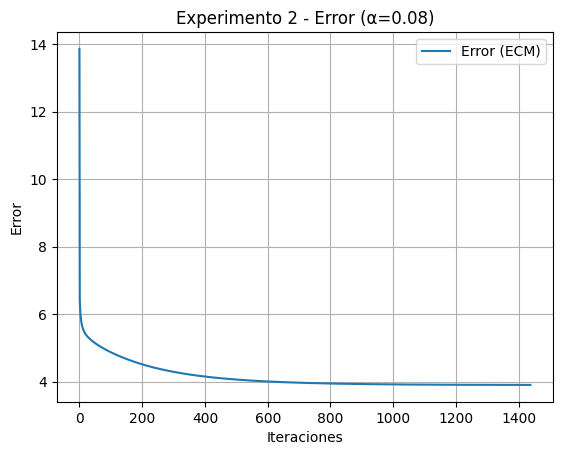

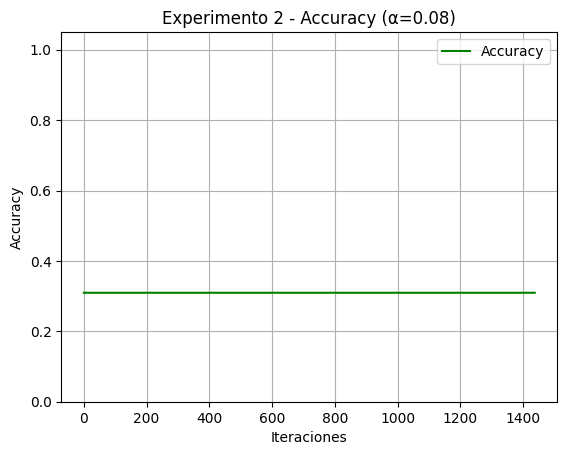

Cantidad total de iteraciones: 1438
Nunca se alcanzó el 100% de accuracy.

=== Experimento 3 | α = 0.12 ===


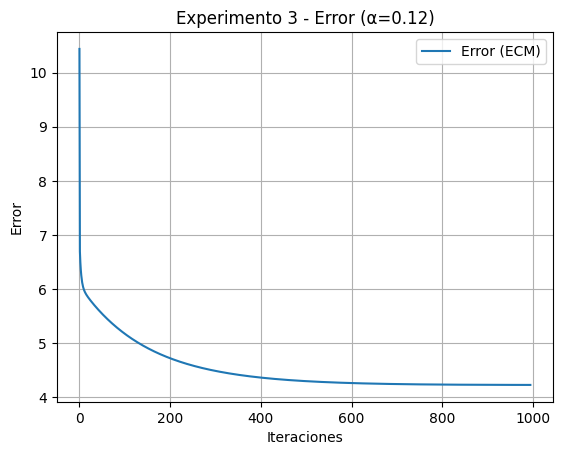

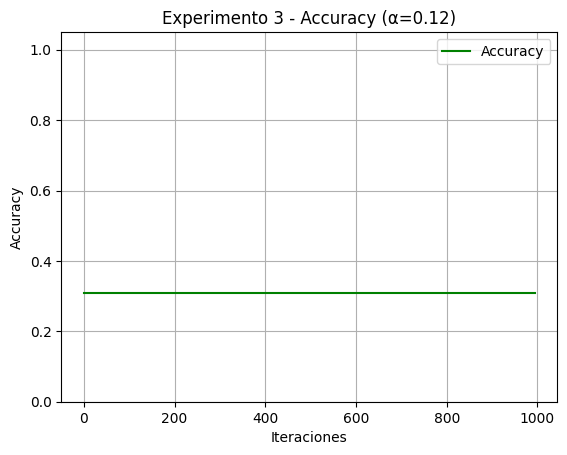

Cantidad total de iteraciones: 995
Nunca se alcanzó el 100% de accuracy.

=== Experimento 4 | α = 0.16 ===


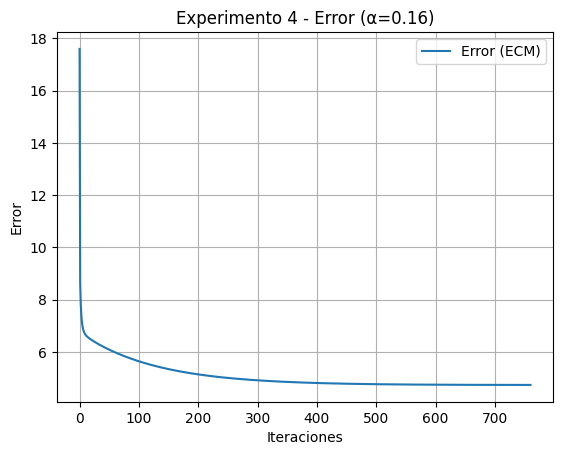

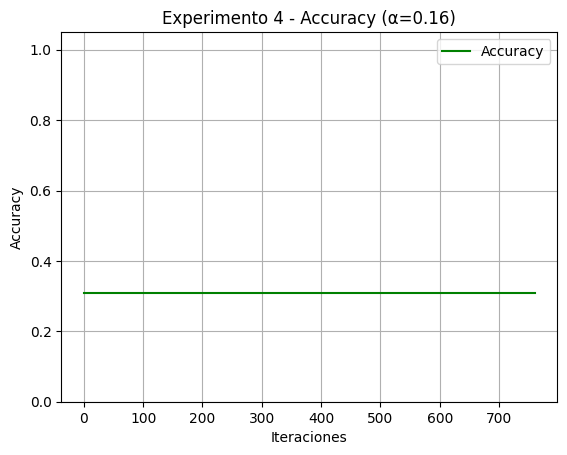

Cantidad total de iteraciones: 761
Nunca se alcanzó el 100% de accuracy.

=== Experimento 5 | α = 0.20 ===


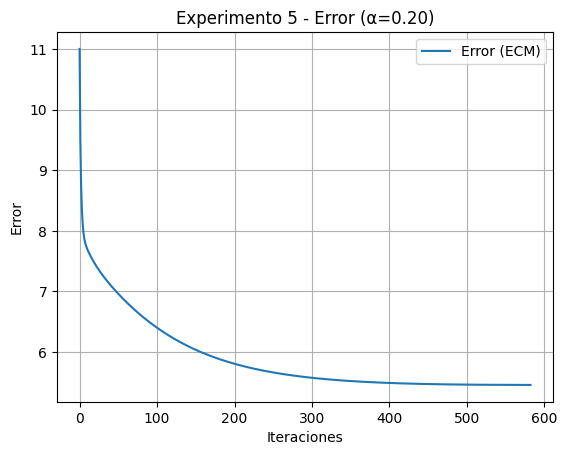

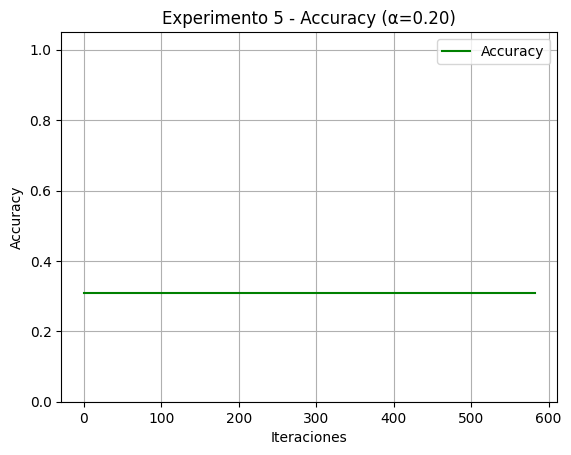

Cantidad total de iteraciones: 583
Nunca se alcanzó el 100% de accuracy.

=== Experimento 6 | α = 0.24 ===


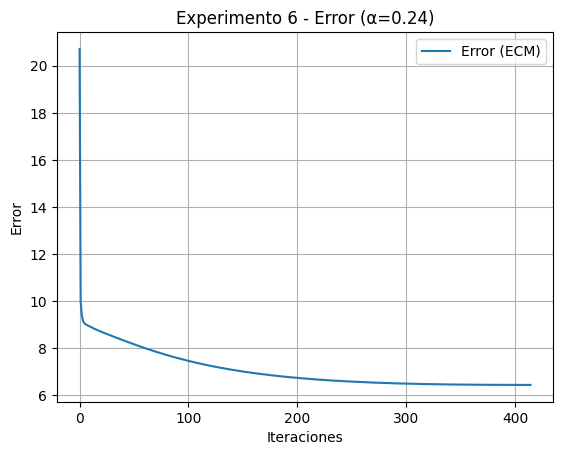

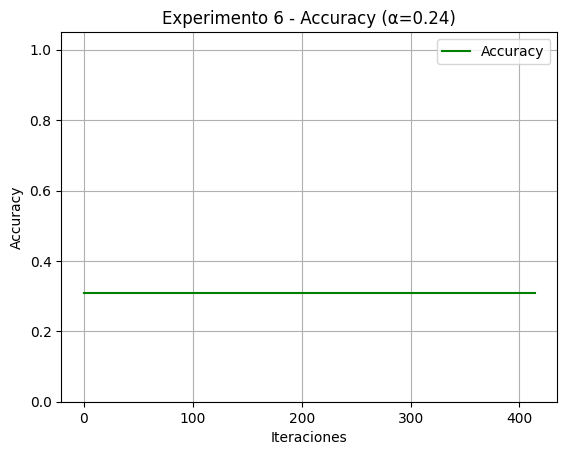

Cantidad total de iteraciones: 415
Nunca se alcanzó el 100% de accuracy.

=== Experimento 7 | α = 0.28 ===


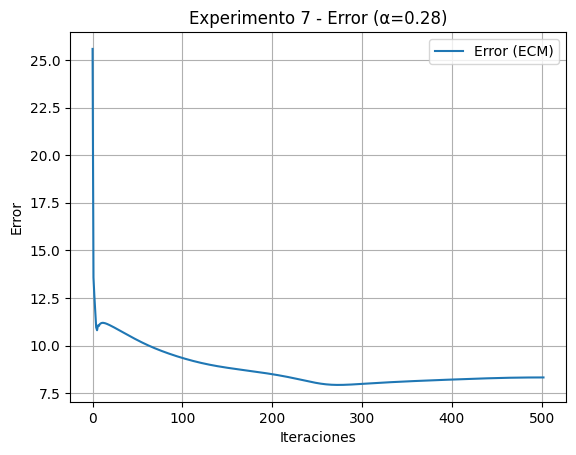

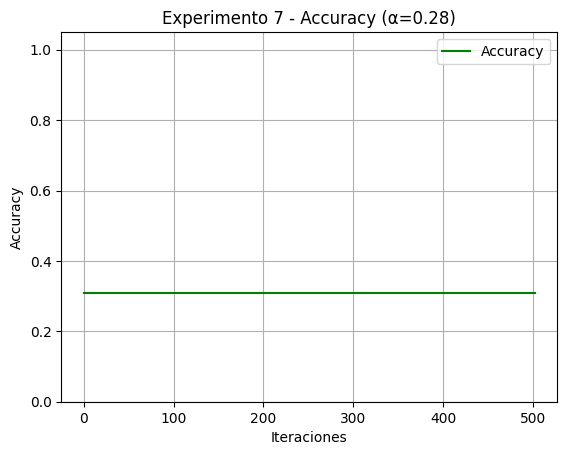

Cantidad total de iteraciones: 503
Nunca se alcanzó el 100% de accuracy.

=== Experimento 8 | α = 0.32 ===


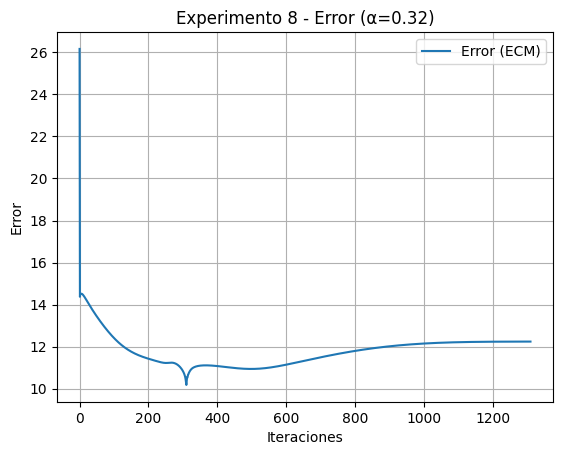

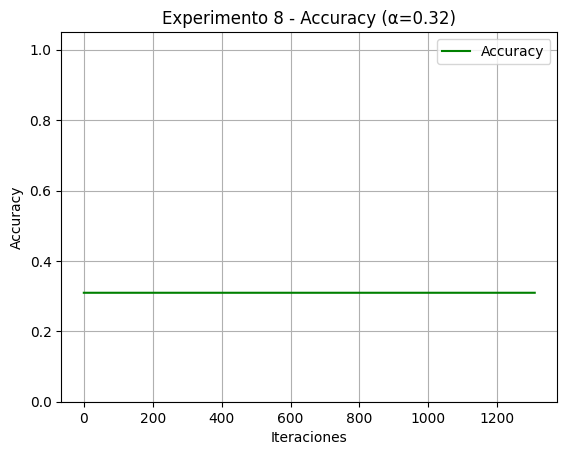

Cantidad total de iteraciones: 1310
Nunca se alcanzó el 100% de accuracy.

=== Experimento 9 | α = 0.36 ===


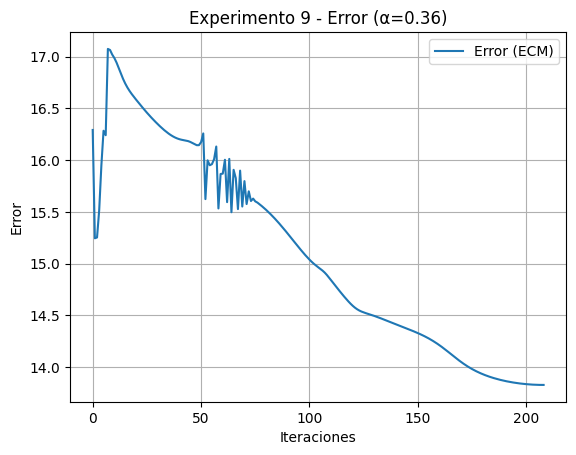

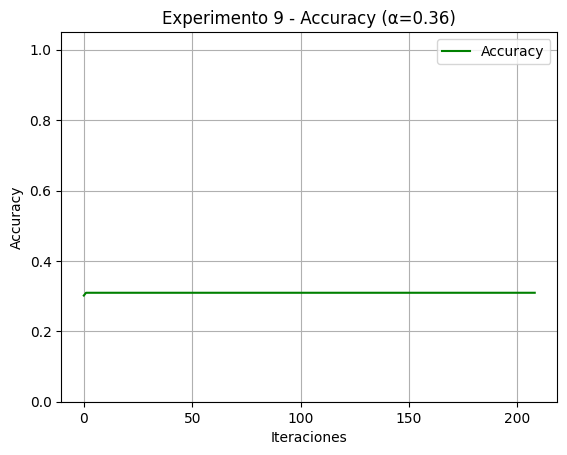

Cantidad total de iteraciones: 209
Nunca se alcanzó el 100% de accuracy.

=== Experimento 10 | α = 0.40 ===


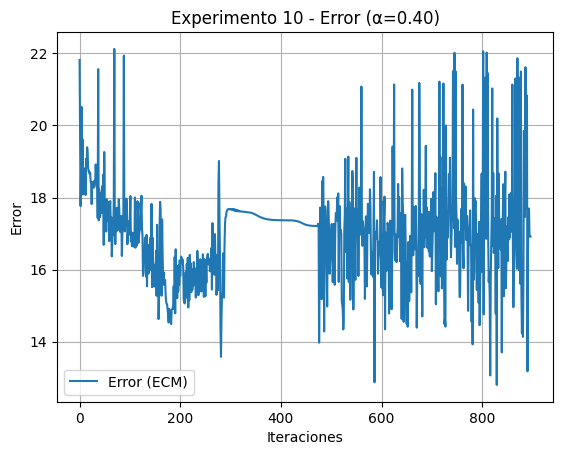

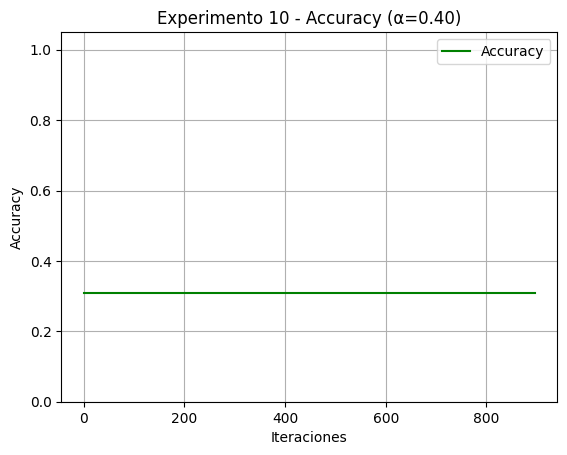

Cantidad total de iteraciones: 897
Nunca se alcanzó el 100% de accuracy.

=== Experimento 11 | α = 0.44 ===


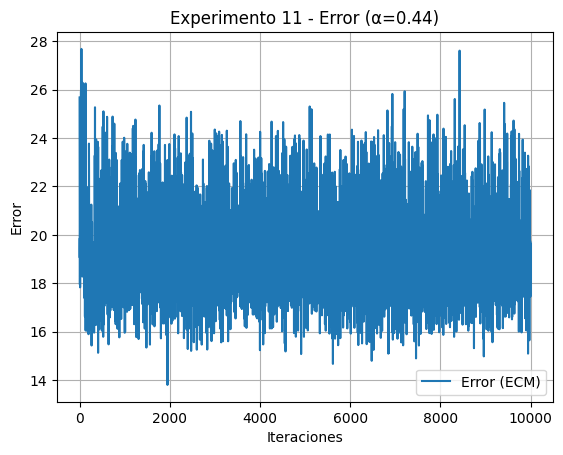

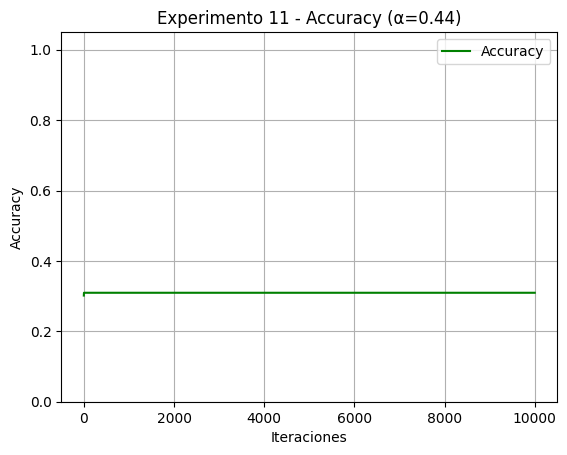

Cantidad total de iteraciones: 10000
Nunca se alcanzó el 100% de accuracy.

=== Experimento 12 | α = 0.48 ===


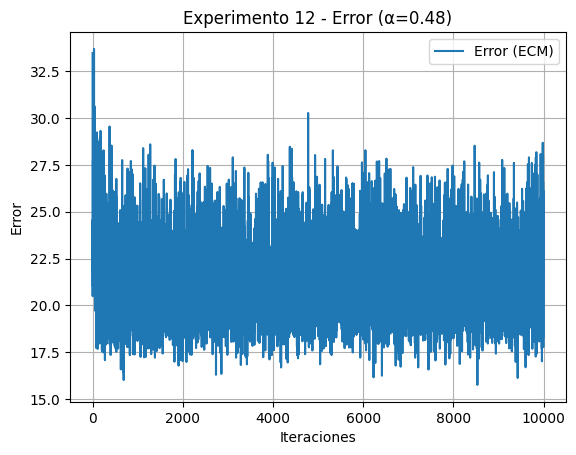

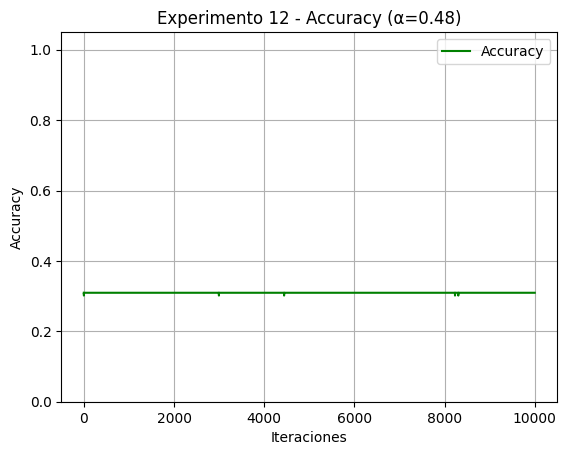

Cantidad total de iteraciones: 10000
Nunca se alcanzó el 100% de accuracy.

=== Experimento 13 | α = 0.52 ===


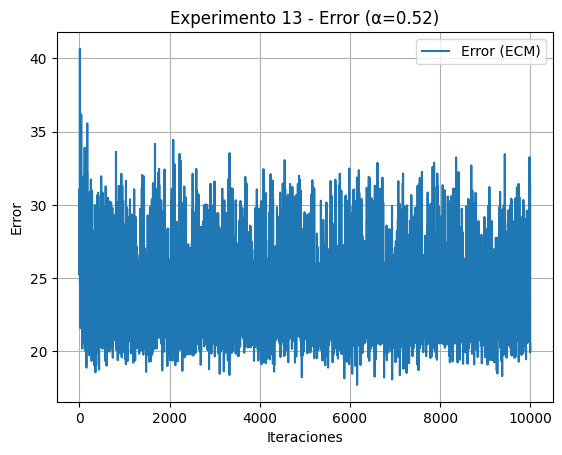

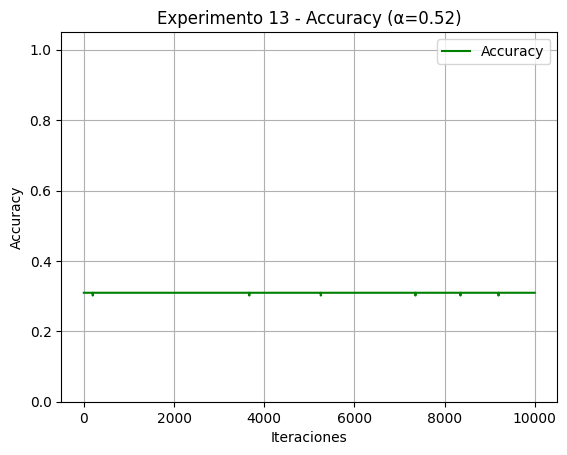

Cantidad total de iteraciones: 10000
Nunca se alcanzó el 100% de accuracy.

=== Experimento 14 | α = 0.56 ===


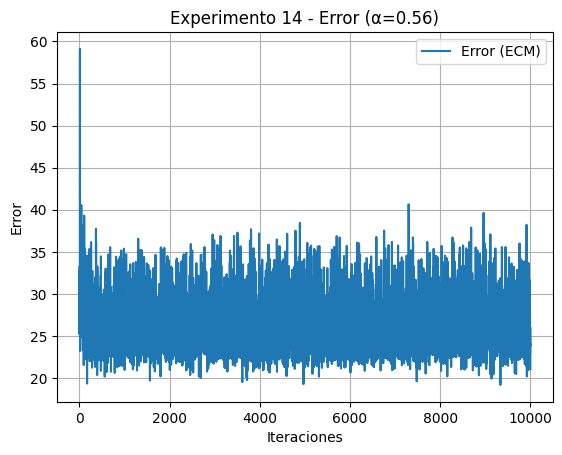

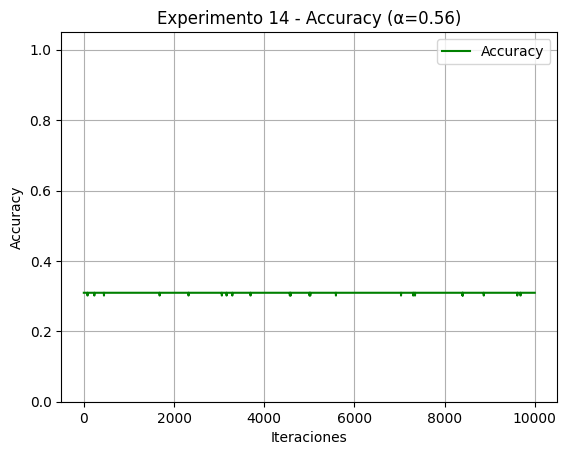

Cantidad total de iteraciones: 10000
Nunca se alcanzó el 100% de accuracy.

=== Experimento 15 | α = 0.60 ===


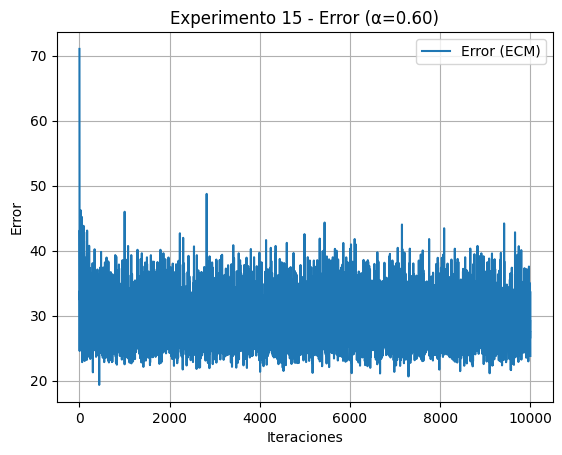

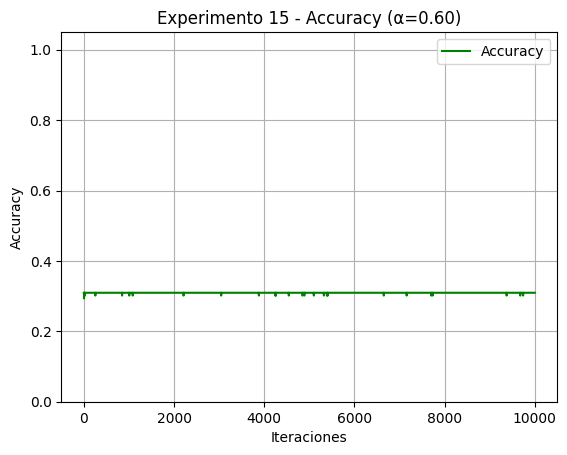

Cantidad total de iteraciones: 10000
Nunca se alcanzó el 100% de accuracy.

=== Experimento 16 | α = 0.64 ===


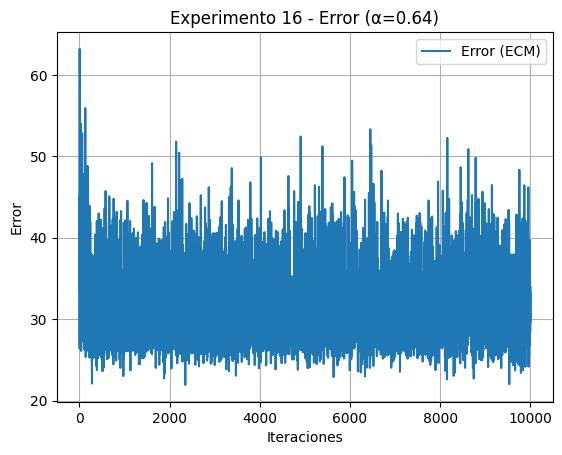

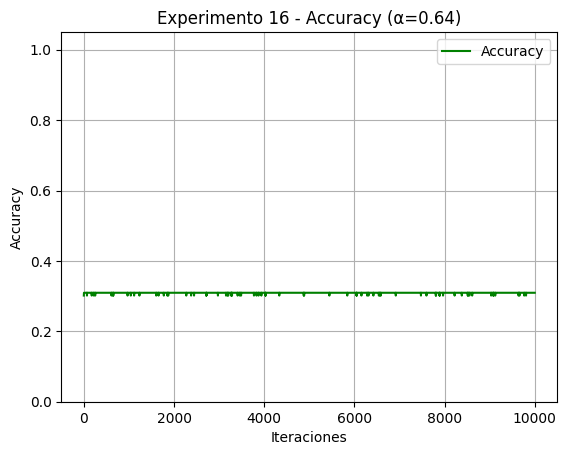

Cantidad total de iteraciones: 10000
Nunca se alcanzó el 100% de accuracy.

=== Experimento 17 | α = 0.68 ===


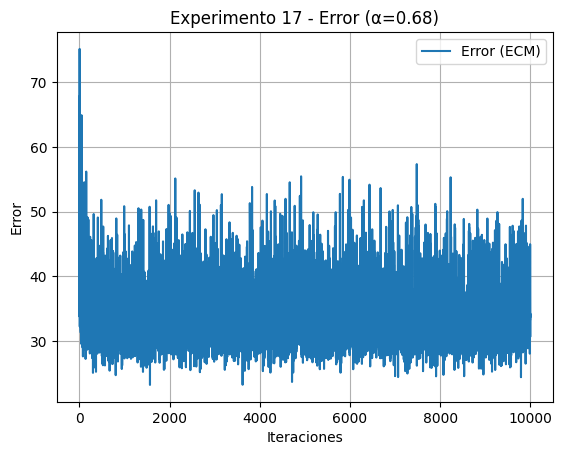

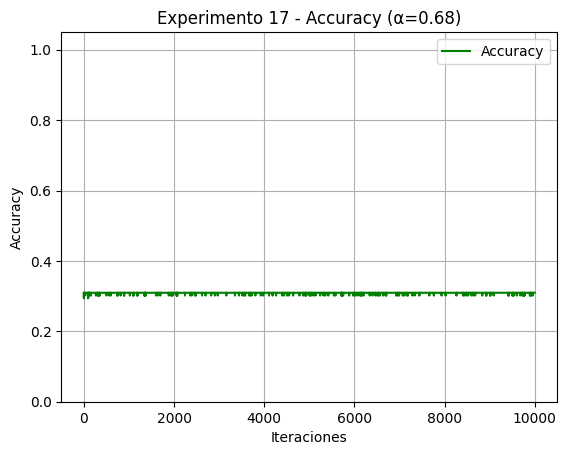

Cantidad total de iteraciones: 10000
Nunca se alcanzó el 100% de accuracy.

=== Experimento 18 | α = 0.72 ===


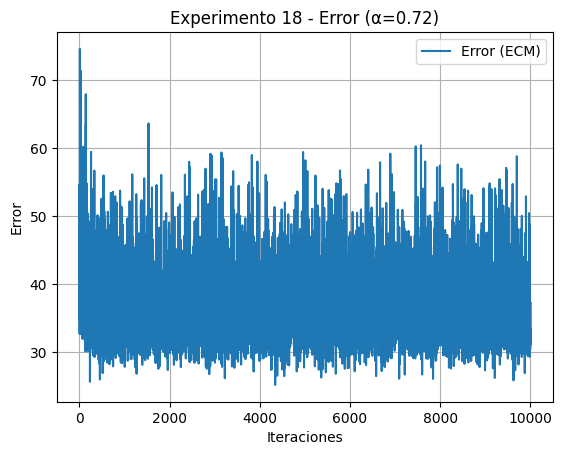

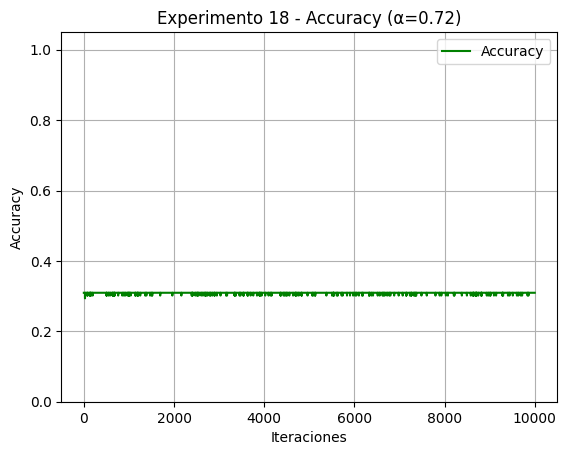

Cantidad total de iteraciones: 10000
Nunca se alcanzó el 100% de accuracy.

=== Experimento 19 | α = 0.76 ===


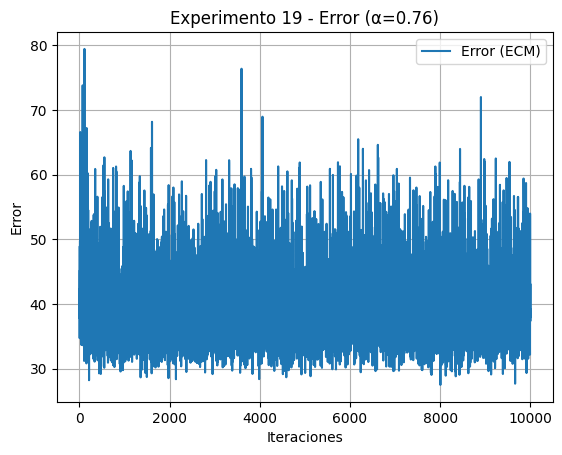

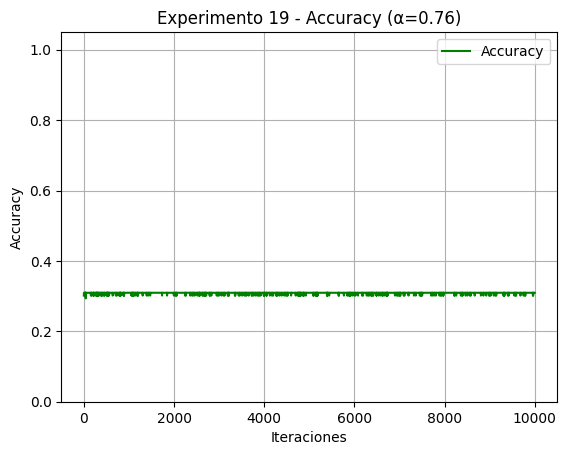

Cantidad total de iteraciones: 10000
Nunca se alcanzó el 100% de accuracy.

=== Experimento 20 | α = 0.80 ===


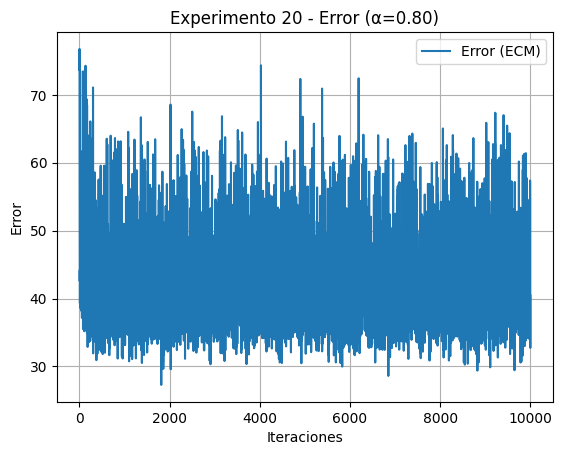

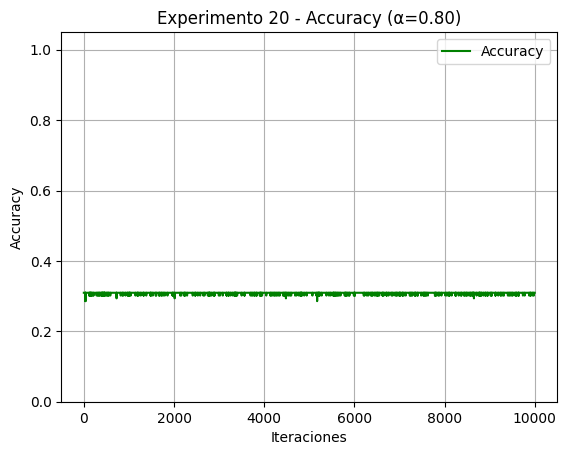

Cantidad total de iteraciones: 10000
Nunca se alcanzó el 100% de accuracy.

Resumen de experimentos:
 Experimento  Alpha  Iteraciones Iter_100%
           1   0.04         2619      None
           2   0.08         1438      None
           3   0.12          995      None
           4   0.16          761      None
           5   0.20          583      None
           6   0.24          415      None
           7   0.28          503      None
           8   0.32         1310      None
           9   0.36          209      None
          10   0.40          897      None
          11   0.44        10000      None
          12   0.48        10000      None
          13   0.52        10000      None
          14   0.56        10000      None
          15   0.60        10000      None
          16   0.64        10000      None
          17   0.68        10000      None
          18   0.72        10000      None
          19   0.76        10000      None
          20   0.80        10000      N

In [18]:
# --- Datos ---
data = pd.read_csv(DATOS_DIR + 'semillas.csv', sep=',')

# Numerizamos la columna 'Clase'
mapeo = {'Tipo1': 1, 'Tipo2': 2, 'Tipo3': 3}
data['Clase'] = data['Clase'].map(mapeo)

# Dividimos en train y test
data_train = data.sample(frac=0.6, random_state=1)
data_test = data.drop(data_train.index)

# Normalizamos por z-score
scaler = preprocessing.StandardScaler().fit(data_train.drop('Clase', axis=1))
X = scaler.transform(data_train.drop('Clase', axis=1))
T = scaler.transform(data_test.drop('Clase', axis=1))

# Etiquetas (Tipo2 vs no-Tipo2)
y_train = (data_train['Clase'] == 2).astype(int).to_numpy()
y_test  = (data_test['Clase'] == 2).astype(int).to_numpy()

# --- Parámetros generales ---
MAX_ITE = 10000
COTA = 10e-6

# --- Experimentos ---
resultados = []

for idx, ALPHA in enumerate([0.04 * (i+1) for i in range(20)], start=1):
    print(f"\n=== Experimento {idx} | α = {ALPHA:.2f} ===")

    ng = NeuronaGradiente(
        alpha=ALPHA, n_iter=MAX_ITE, cotaE=COTA,
        FUN='tanh', title=['Semillas','Tipo2'], with_bias=True
    )
    ng.fit(X, y_train)

    # --- Gráfico Error ---
    plt.figure()
    plt.plot(ng.errors_, label="Error (ECM)")
    plt.xlabel("Iteraciones")
    plt.ylabel("Error")
    plt.title(f"Experimento {idx} - Error (α={ALPHA:.2f})")
    plt.legend()
    plt.grid(True)
    plt.show()

    # --- Gráfico Accuracy ---
    plt.figure()
    plt.plot(ng.accuracy_, label="Accuracy", color="green")
    plt.xlabel("Iteraciones")
    plt.ylabel("Accuracy")
    plt.title(f"Experimento {idx} - Accuracy (α={ALPHA:.2f})")
    plt.ylim(0, 1.05)
    plt.legend()
    plt.grid(True)
    plt.show()

    # --- Métricas ---
    total_iters = len(ng.errors_)
    iters_100 = next((i for i, acc in enumerate(ng.accuracy_, start=1) if acc == 1.0), None)

    print(f"Cantidad total de iteraciones: {total_iters}")
    if iters_100:
        print(f"Accuracy 100% alcanzada en la iteración: {iters_100}")
    else:
        print("Nunca se alcanzó el 100% de accuracy.")

    # Guardamos resultados en tabla
    resultados.append({
        "Experimento": idx,
        "Alpha": ALPHA,
        "Iteraciones": total_iters,
        "Iter_100%": iters_100
    })

# --- Tabla resumen ---
df_resultados = pd.DataFrame(resultados)
print("\nResumen de experimentos:")
print(df_resultados.to_string(index=False))

### c) 

Compare y analice los resultados obtenidos en a) y b).  

La tanh satura más rápido que la sigmoide (sus derivadas tienden a 0 antes en valores grandes).
Al aumentar mucho $\alpha$, los pasos de gradiente son muy bruscos → fácilmente terminás en una zona saturada → gradientes muy chicos → el aprendizaje se frena o se vuelve inestable.
El mal desempeño con tanh se debe a que la salida esperada (0/1) no coincide con el rango de la activación (-1/1), y a que el gradiente se comporta distinto, haciéndose más sensible a la tasa de aprendizaje.